In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_csv("placement_cgpa_lpa.csv")

In [100]:
df.sample(15)

,cgpa,package
59,7.56,3.31
180,6.19,2.72
53,6.47,2.61
94,5.83,2.42
138,7.91,3.89
134,7.20,2.83
182,5.88,2.08
186,7.84,3.47
43,7.66,2.76
171,8.01,3.76


In [101]:
df.shape

(200, 2)

<Axes: xlabel='cgpa', ylabel='package'>

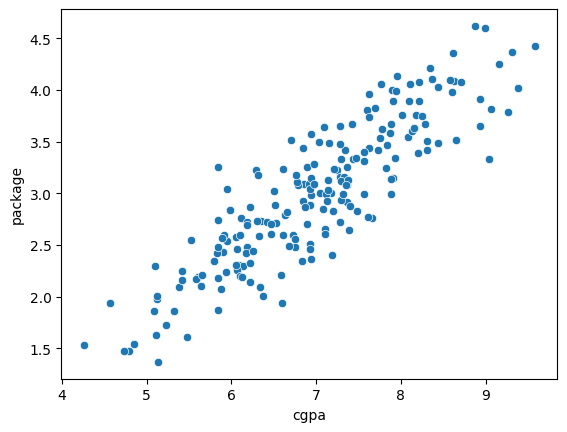

In [102]:
sns.scatterplot(x="cgpa",y="package",data=df)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x=df[["cgpa"]]
y=df["package"]

In [105]:
x.shape

(200, 1)

In [106]:
y.shape

(200,)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [108]:
x_train

,cgpa
114,5.84
187,6.26
76,6.94
122,5.12
142,6.93
...,...
132,5.84
33,6.35
109,7.77
139,7.19


In [109]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [110]:
lr.fit(x_train,y_train) # Trained the data set 


LinearRegression()

In [111]:
y_pred=lr.predict(x_test)

In [112]:
y_pred

array([3.89986851, 3.68809475, 4.10591865, 3.8197379 , 2.52047729,
       3.15579855, 2.54909536, 2.47468837, 3.24165278, 1.69627672,
       2.48041198, 3.11573325, 3.16724578, 3.06994433, 3.15579855,
       2.77231635, 2.49185921, 2.53192452, 3.5163863 , 3.9742755 ,
       2.66356766, 2.182784  , 2.72652743, 3.17869301, 3.07566794,
       3.8197379 , 2.61205513, 3.19014024, 2.4117286 , 3.64230583,
       1.90805048, 2.69218574, 2.97836649, 3.20731109, 3.06422071,
       3.72816006, 4.23183818, 2.91540672, 3.18441663, 3.35612508,
       2.54909536, 3.15579855, 3.92276297, 3.53355715, 4.35775771,
       2.53192452, 3.04704987, 2.63494959, 2.95547203, 2.70935658,
       1.91949771, 4.1631548 , 3.53928076, 3.91131574, 3.93993381,
       3.92848658, 3.65375306, 3.43053207, 2.12554785, 2.90395949])

In [113]:
y_test.values

array([4.1 , 4.08, 3.65, 4.03, 2.42, 3.16, 2.33, 2.31, 3.33, 1.48, 2.2 ,
       3.24, 2.94, 2.93, 3.65, 3.24, 2.76, 2.48, 3.89, 4.08, 2.72, 2.17,
       2.71, 2.99, 3.13, 3.49, 2.59, 3.42, 2.84, 3.6 , 2.3 , 2.7 , 3.28,
       3.08, 2.99, 3.67, 4.25, 3.09, 3.16, 3.44, 2.87, 2.72, 4.36, 3.99,
       4.02, 2.69, 3.64, 2.01, 2.89, 3.02, 1.98, 3.33, 4.14, 3.98, 3.52,
       4.09, 3.63, 3.54, 1.61, 2.35])

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [115]:
print("R2 Score = " , r2_score(y_pred,y_test))

R2 Score =  0.7579829124870977


In [116]:
print("MAE = " , mean_absolute_error(y_test,y_pred))

MAE =  0.23858439295434308


In [117]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 0.09437083788641362


In [118]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 0.3071983689514214


In [119]:
# for Adjusted R2 Score => 1-[(1-r2)(n-1) / (n-1-k)]

In [120]:
n=x_train.shape
n

r2=r2_score(y_pred,y_test)

In [121]:
1 - ((1-r2)*(40-1)/(40-1-1))


0.7516140417630739

In [122]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.509505,3.26
1,5.12,0.646754,1.98
2,7.82,0.678987,3.25
3,7.42,0.449599,3.67
4,6.94,0.239905,3.57


Text(0, 0.5, 'Package(in lpa)')

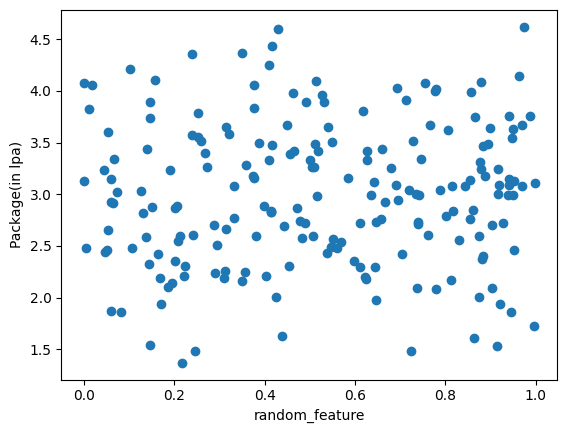

In [123]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [124]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [126]:
lr = LinearRegression()

In [127]:
lr.fit(X_train,y_train)

LinearRegression()

In [128]:
y_pred = lr.predict(X_test)